# House Rocket - ETL 

## LIBRARIES AND SETTINGS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from geopy.geocoders import Nominatim

In [2]:
# graphics style
sns.set_style('whitegrid')

## FUNCTIONS

In [3]:
# configure the axes of the chart
def axis_settings(x_label, y_label = ' ', fontsize = 12, x_rotation = 0, y_rotation = 0):
    plt.xlabel(x_label, fontsize = fontsize)
    plt.ylabel(y_label, fontsize = fontsize)
    plt.xticks(fontsize = fontsize, rotation = x_rotation)
    plt.yticks(fontsize = fontsize, rotation = y_rotation)

## 1. DATA LOADING

### 1.1. CSV file

The dataset can be downloaded from this [link](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?sort=recent-comments).

In [41]:
# open the file
df = pd.read_csv('../data/kc_house_data.csv')

### 1.2. API request

In [ ]:
# coordinates 'latitude, longitude'
coordinates = df['lat'].astype(str) + ', ' + df['long'].astype(str)

# initialize Nominatim API
geolocator = Nominatim(user_agent='geoapiExercise')

# create a dataframe with coordinates values
df_address = pd.DataFrame()
df_address['id'] = df['id'].copy()

In [ ]:
# data collect from API
for i in range(len(df)):
    # data collect
    address = geolocator.reverse(coordinates[i]).raw['address']
    print(i)
    
    # add to dataframe
    if 'emergency' in address:
        df_address.loc[i, 'emergency'] = address['emergency']
    if 'residential' in address:
        df_address.loc[i, 'residential'] = address['residential']
    if 'house_number' in address:
        df_address.loc[i, 'house_number'] = address['house_number']
    if 'amenity' in address:
        df_address.loc[i, 'amenity'] = address['amenity']
    if 'shop' in address:
        df_address.loc[i, 'shop'] = address['shop']
    if 'town' in address:
        df_address.loc[i, 'town'] = address['town']
    if 'retail' in address:
        df_address.loc[i, 'retail'] = address['retail']
    if 'tourism' in address:
        df_address.loc[i, 'tourism'] = address['tourism']
    if 'city' in address:
        df_address.loc[i, 'city'] = address['city']
    if 'building' in address:
        df_address.loc[i, 'building'] = address['building']
    if 'historic' in address:
        df_address.loc[i, 'historic'] = address['historic']
    if 'village' in address:
        df_address.loc[i, 'village'] = address['village']
    if 'hamlet' in address:
        df_address.loc[i, 'hamlet'] = address['hamlet']
    if 'road' in address:
        df_address.loc[i, 'road'] = address['road']
    if 'neighbourhood' in address:
        df_address.loc[i, 'neighbourhood'] = address['neighbourhood']
    if 'commercial' in address:
        df_address.loc[i, 'commercial'] = address['commercial']
    if 'leisure' in address:
        df_address.loc[i, 'leisure'] = address['leisure']
    if 'county' in address:
        df_address.loc[i, 'county'] = address['county']
    if 'suburb' in address:
        df_address.loc[i, 'suburb'] = address['suburb']
    if 'natural' in address:
        df_address.loc[i, 'natural'] = address['natural']

# export the dataframe in a csv file
df_address.to_csv('../data/address.csv', index=False)

In [42]:
# open the file
df1 = pd.read_csv('../data/address.csv')

### 1.3. Merge dataset

In [43]:
df_raw = df.merge(df1, left_on = 'id', right_on = 'id')

## 2. DATA DESCRIPTION

### 2.1. Basic information

In [44]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21969 entries, 0 to 21968
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21969 non-null  int64  
 1   date           21969 non-null  object 
 2   price          21969 non-null  float64
 3   bedrooms       21969 non-null  int64  
 4   bathrooms      21969 non-null  float64
 5   sqft_living    21969 non-null  int64  
 6   sqft_lot       21969 non-null  int64  
 7   floors         21969 non-null  float64
 8   waterfront     21969 non-null  int64  
 9   view           21969 non-null  int64  
 10  condition      21969 non-null  int64  
 11  grade          21969 non-null  int64  
 12  sqft_above     21969 non-null  int64  
 13  sqft_basement  21969 non-null  int64  
 14  yr_built       21969 non-null  int64  
 15  yr_renovated   21969 non-null  int64  
 16  zipcode        21969 non-null  int64  
 17  lat            21969 non-null  float64
 18  long  

**Observation:**
- Almost all variables that contain address characteristics have missing data. This is due to the difference in nomenclature, such as `city` and `town`, which have slightly different definitions but generally describe the place in the same way. This will be dealt with later.
- `date` type is `object` instead of `datetime`;
- `bathrooms` type is `float`. This is because each item present in the bathroom (shower, bathtub, toilet and sink) counts as 0.25, so a bathroom with three items is considered 0.75. Further explanations can be found in this [link](https://www.badeloftusa.com/buying-guides/75-bathroom/).
- `floors` type is `float`. The fractional part of this variable refers to a partial floor, more information can be found at this [link](https://www.costahomebuilders.com/custom-home-plans/need-1-2-story-home/).

### 2.2. Statistic measures

In [18]:
df_raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.196900e+04,2.196900e+04,21969.000000,21969.000000,21969.000000,2.196900e+04,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000
mean,4.579052e+09,5.380970e+05,3.369384,2.109598,2074.334426,1.505021e+04,1.490578,0.007420,0.232692,3.407438,7.647139,1783.311393,291.023032,1970.821157,83.755383,98078.099276,47.559845,-122.214296,1983.030771,12733.700396
std,2.876614e+09,3.663890e+05,0.931695,0.770664,917.044924,4.118718e+04,0.539185,0.085819,0.764770,0.651837,1.177961,826.228751,442.159118,29.348721,400.189783,53.578651,0.138485,0.140693,684.801400,27163.313081
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.122059e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470500,-122.329000,1480.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571200,-122.231000,1830.000000,7620.000000
75%,7.309100e+09,6.410000e+05,4.000000,2.500000,2540.000000,1.067500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10080.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 2.3. Univariate analysis

#### 2.3.1. Price distribution

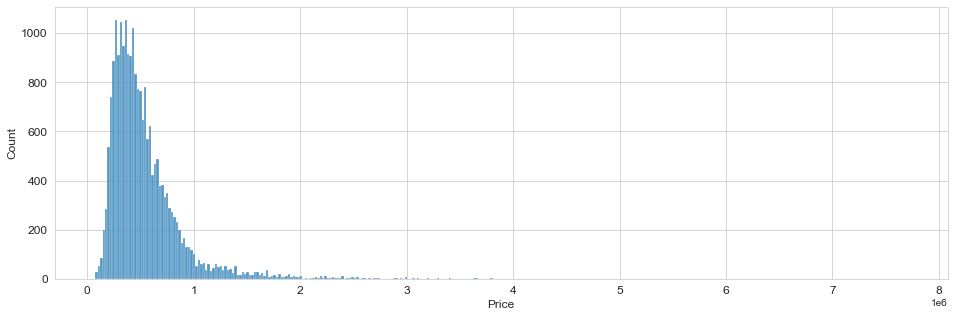

In [19]:
plt.figure(figsize = (16, 5))
sns.histplot(data = df_raw, x = 'price')
axis_settings('Price', 'Count')
plt.show()

**Observation:**
- most homes cost less than US$1 million;
- this variable has a right skewness.

#### 2.3.2. Bedrooms, bathrooms and floors boxplot

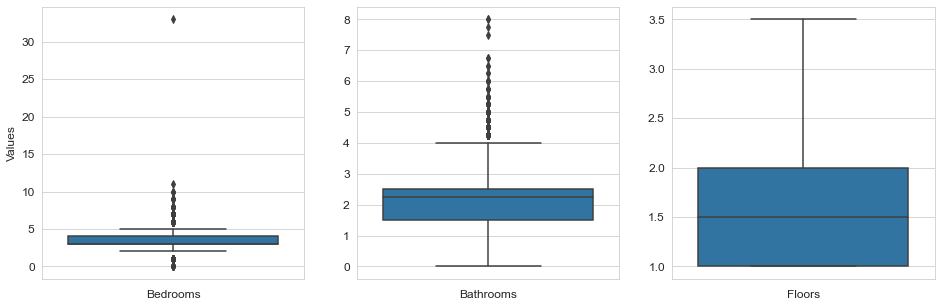

In [20]:
plt.figure(figsize = (16, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = df_raw, y = 'bedrooms')
axis_settings('Bedrooms', 'Values')

plt.subplot(1, 3, 2)
sns.boxplot(data = df_raw, y = 'bathrooms')
axis_settings('Bathrooms')

plt.subplot(1, 3, 3)
sns.boxplot(data = df_raw, y = 'floors')
axis_settings('Floors')

plt.show()

**Observation:**
- First graph (bedrooms):
    - There are houses with no bedrooms that they'll delete from the dataset;
    - There are houses with many bedrooms, above 20, so I'll analyze each case and decide if it's necessary delete them.
    
    
- Second graph (bathrooms):
    - There are houses with no bathrooms that they'll delete from the dataset;
    - In order to have a good quality of life, a house must have at least one bathroom with some basic items, such as a toilet, sink and shower/bath, that is, it is necessary to have at least a 3/4 bathroom. That said, one-bathroom homes with only two of these items (under 3/4) will be excluded from the base.
    
    
- Third graph (floors):
    - Most houses have up to two floors.

#### 2.3.3. sqft_living and sqft_lot distribution

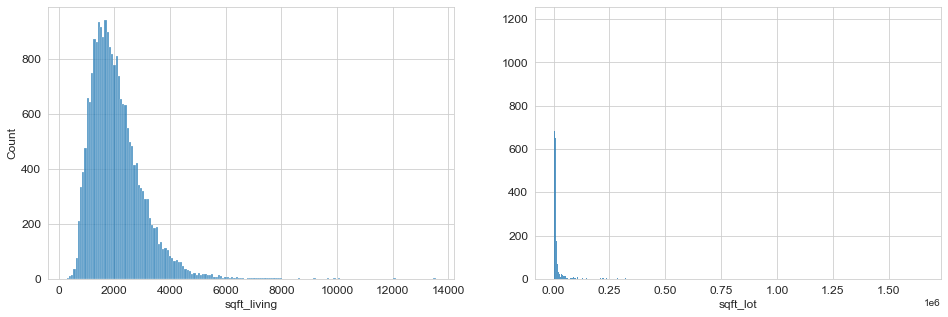

In [21]:
plt.figure(figsize = (16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data = df_raw, x = 'sqft_living')
axis_settings('sqft_living', 'Count')

plt.subplot(1, 2, 2)
sns.histplot(data = df_raw, x = 'sqft_lot')
axis_settings('sqft_lot')

plt.show()

**Observation:**
- First graph (sqft_living):
    - Most houses are less than 4000ft²;
    - This variable has a right skewness.
    
    
- Second graph (sqft_lot):
    - This variable has a right skewness.

#### 2.3.4. sqft_above and sqft_basement distributions

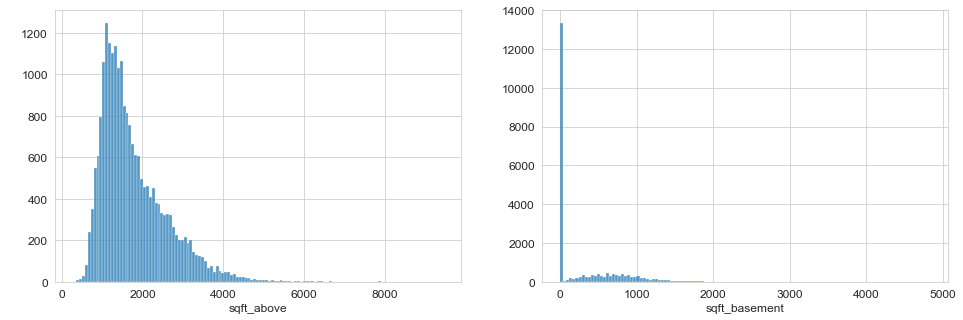

In [22]:
plt.figure(figsize = (16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data = df_raw, x = 'sqft_above')
axis_settings('sqft_above')

plt.subplot(1, 2, 2)
sns.histplot(data = df_raw, x = 'sqft_basement')
axis_settings('sqft_basement')

plt.show()

**Observation:**
- First graph (sqft_above):
    - Most houses are less than 4000ft²;
    - This variable has a right skewness.
    
    
- Second graph (sqft_basement):
    - Most houses there aren't basement;
    - Of the houses that have a basement, most of them have up to 1000ft².

#### 3.2.5. Waterfront and View distributions

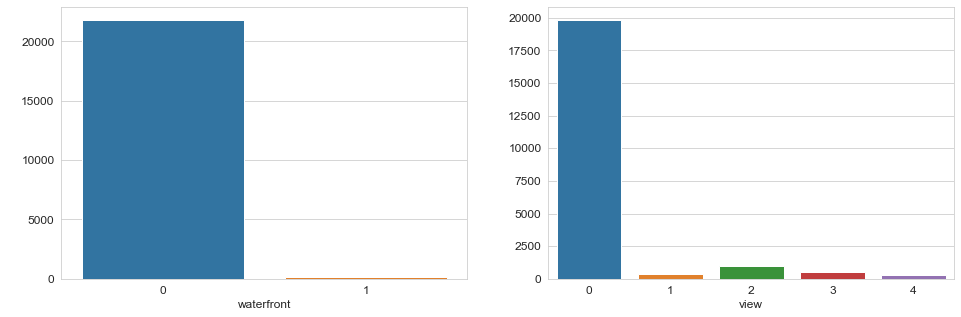

In [23]:
plt.figure(figsize = (16, 5))

plt.subplot(1, 2, 1)
sns.countplot(data = df_raw, x = 'waterfront')
axis_settings('waterfront')

plt.subplot(1, 2, 2)
sns.countplot(data = df_raw, x = 'view')
axis_settings('view')

plt.show()

**Observation:**
- First graph (waterfront):
    - Most houses aren't waterfront.


- Second graph (view):
    - The higher the index, the better the view. Therefore, most houses have a bad view (index 0).

#### 2.3.6. Condition and Grade distributions

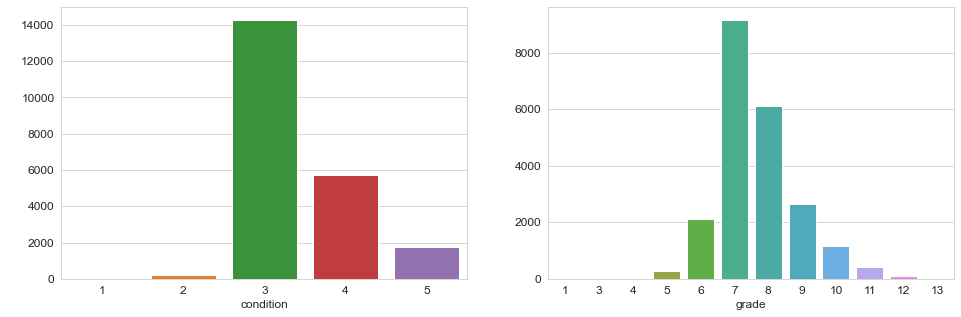

In [24]:
plt.figure(figsize = (16, 5))

plt.subplot(1, 2, 1)
sns.countplot(data = df_raw, x = 'condition')
axis_settings('condition')

plt.subplot(1, 2, 2)
sns.countplot(data = df_raw, x = 'grade')
axis_settings('grade')

plt.show()

**Observation:**
- First graph (condition):
    - Most of the houses are in conditions above 3 (the higher this value, the better the conditions);
    - Indexes 1 and 2 refer to houses that need a lot of repairs before they can be occupied, so they would not, in principle, be a good deal.


- Second graph (grade):
    - The `grade` variable refers to the qualities of the products used in the construction and repair of houses, the higher this index, the higher the quality of the property. Most houses are between 6 and 10;
    - There are few residences with a `grade` lower than 5, which represent houses made with products with poor quality.
    

Information about these variables can be found at this [link](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r).

#### 2.3.7. yr_built distribution

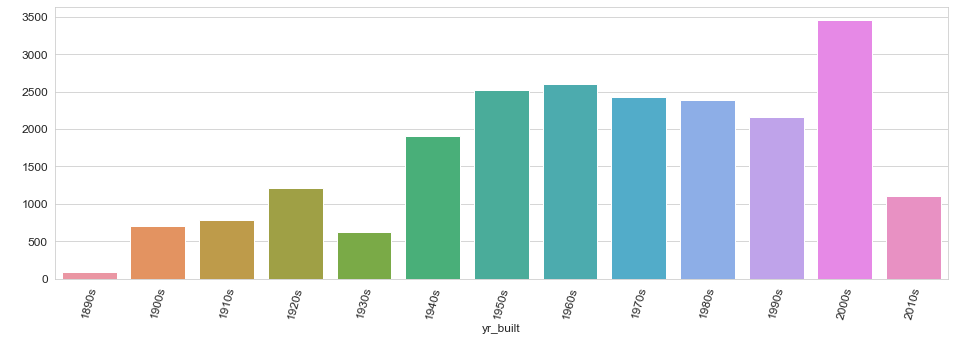

In [25]:
# transform years in decades
bins = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', 
          '1990s', '2000s', '2010s']

decades = pd.cut(x = df_raw['yr_built'], bins = bins, labels = labels)

# graph
plt.figure(figsize = (16, 5))
sns.countplot(x = decades)
axis_settings('yr_built', x_rotation = 75)
plt.show()

**Observation:**
- Most houses were built after 1960.

#### 2.3.8. yr_renovated distribution

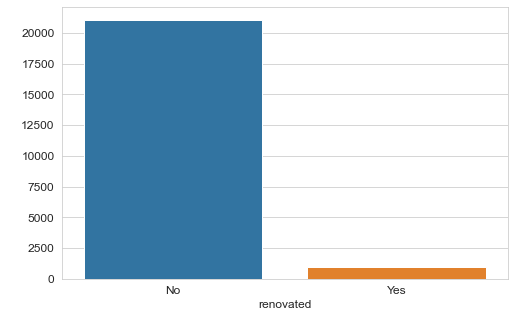

In [26]:
# divide the data in houses renovated and no renovated
renovated = df_raw['yr_renovated'].apply(lambda x: 'No' if x == 0 else 'Yes')

# graph
plt.figure(figsize = (8, 5))
sns.countplot(x = renovated)
axis_settings('renovated')
plt.show()

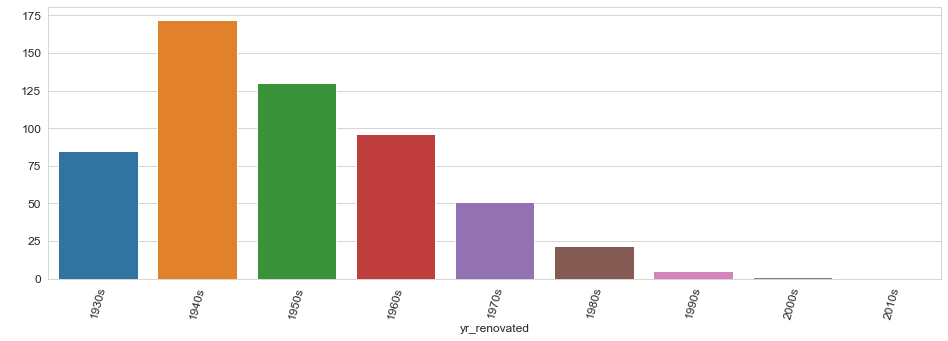

In [27]:
# select only values different from 0
aux = df_raw[df_raw['yr_renovated'] != 0]

# transform years in decades
bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

decades2 = pd.cut(x = aux['yr_built'], bins = bins, labels = labels)

# graph
plt.figure(figsize = (16, 5))
sns.countplot(x = decades2)
axis_settings('yr_renovated', x_rotation = 75)
plt.show()

**Observation:**
- Fist graph (renovated):
    - Most of the houses haven't been renovated.


- Second graph (yr_renovated):
    - This graph only shows houses that have been renovated;
    - Most houses have been renovated before 1960.

#### 2.3.9. City and Town distribution

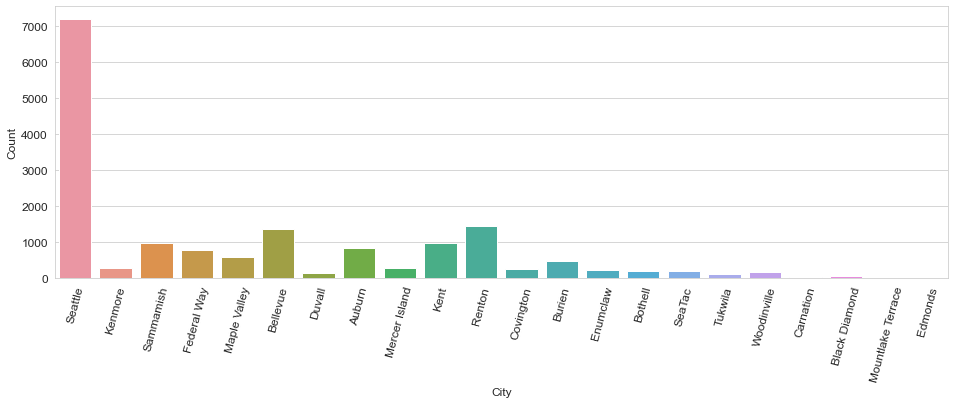

In [28]:
# graph
plt.figure(figsize = (16, 5))
sns.countplot(x = 'city', data= df_raw)
axis_settings('City', 'Count', x_rotation = 75)
plt.show()

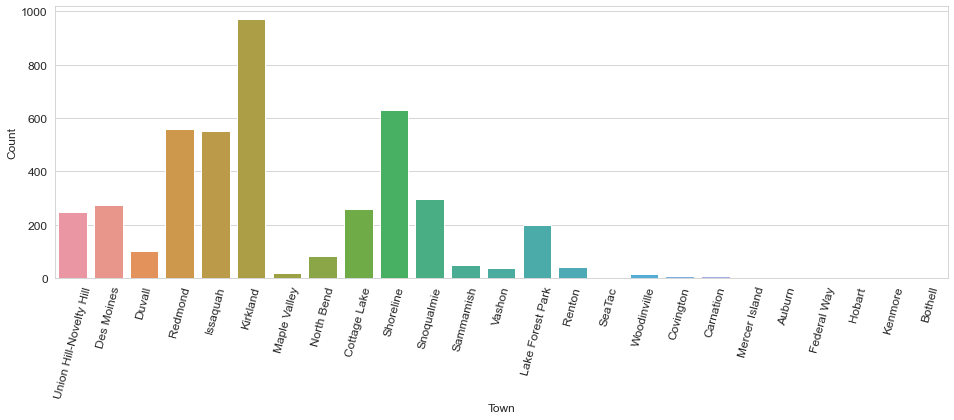

In [29]:
# graph
plt.figure(figsize = (16, 5))
sns.countplot(x = 'town', data= df_raw)
axis_settings('Town', 'Count', x_rotation = 75)
plt.show()

**Observation:**
- Fist graph (city):
    - Seattle is the city with the most properties available, followed by Bellevue and Renton.


- Second graph (town):
    - Kirkland is the only town with over 1000 homes available.

## 3. DATA CLEANING 

In [45]:
# change data type - date
df_raw['date'] = pd.to_datetime(df_raw['date'])

# deleting the oldest duplicate records
df_raw = df_raw.sort_values(by=['id', 'date'], ascending=True).drop_duplicates('id', keep='last').reset_index(drop=True)

# excludes houses with 0 or more than 11 bedrooms
df_raw = df_raw.drop(df_raw[(df_raw['bedrooms'] == 0) | (df_raw['bedrooms'] >= 11)].index).reset_index(drop=True)

# excludes home with bathrooms with fewer than three items (< 0.75)
df_raw = df_raw.drop(df_raw[df_raw['bathrooms'] < 0.75].index).reset_index(drop=True)

# removes lines whose ratio between sqft_above and sqft_lot than the number of floors
df_raw = df_raw.drop((df_raw[(df_raw['sqft_above'] / df_raw['sqft_lot']) > df_raw['floors']]).index).reset_index(drop=True)

# removes lines whose sale date is before the construction year
df_raw = df_raw.drop((df_raw[df_raw['date'].dt.year < df_raw['yr_built']]).index).reset_index(drop=True)

# selection of properties in good condition (>= 3) and made with good quality materials (>= 5)
df_raw = df_raw.loc[(df_raw['condition'] >= 3) & (df_raw['grade'] >= 5)].reset_index(drop=True)

In [46]:
# addresses that don't have a city but have a town
index_town = df_raw[(df_raw['city'].isna()) & (~df_raw['town'].isna())].index.tolist()

# put the town name in the city column
for i in index_town:
    df_raw.loc[i, 'city'] = df_raw.loc[i, 'town']

    
# addresses that don't have city or town but have village
index_village = df_raw[(df_raw['city'].isna()) & (df_raw['town'].isna()) & (~df_raw['village'].isna())].index.tolist()

# put the village name in the city column
for i in index_village:
    df_raw.loc[i, 'city'] = df_raw.loc[i, 'village']

    
# addresses that don't have city or town or village but have suburb
index_suburb = df_raw[(df_raw['city'].isna()) & (df_raw['town'].isna()) & (df_raw['village'].isna()) & (~df_raw['suburb'].isna())].index.tolist()

# put the suburb name in the city column
for i in index_suburb:
    df_raw.loc[i, 'city'] = df_raw.loc[i, 'suburb']

    
# addresses that don't have city or town or village or suburb but have hamlet
index_hamlet = df_raw[(df_raw['city'].isna()) & (df_raw['town'].isna()) & (df_raw['village'].isna()) & (df_raw['suburb'].isna()) & (~df_raw['hamlet'].isna())].index.tolist()

# put the hamlet name in the city column
for i in index_hamlet:
    df_raw.loc[i, 'city'] = df_raw.loc[i, 'hamlet']
    
# drop town, village, suburb and hamlet columns
df_raw.drop(['town', 'village', 'suburb', 'hamlet'], axis=1, inplace=True)

In [47]:
# join residential and building columns
index_building = df_raw[(df_raw['residential'].isna()) & (~df_raw['building'].isna())].index.tolist()

for i in index_building:
    df_raw.loc[i, 'residential'] = df_raw.loc[i, 'building']
    
# drop building column
df_raw.drop(['building'], axis=1, inplace=True)

In [48]:
# join amenity, leisure, commercial, historic, tourism, natural, shop, retail and emergency columns
for i in df_raw[(~df_raw['amenity'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'amenity']
    
for i in df_raw[(~df_raw['leisure'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'leisure']
    
for i in df_raw[(~df_raw['commercial'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'commercial']
    
for i in df_raw[(~df_raw['historic'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'historic']

for i in df_raw[(~df_raw['tourism'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'tourism']

for i in df_raw[(~df_raw['natural'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'natural']
    
for i in df_raw[(~df_raw['shop'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'shop']
    
for i in df_raw[(~df_raw['retail'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'retail']

for i in df_raw[(~df_raw['emergency'].isna())].index.tolist():
    df_raw.loc[i, 'nearby_attractions'] = df_raw.loc[i, 'emergency']
    
# drop amenity, leisure, commercial, historic, tourism, natural, shop, retail and emergency columns
df_raw.drop(['amenity', 'leisure', 'commercial', 'historic', 'tourism', 'natural', 'shop', 'retail', 'emergency'], axis=1, inplace=True)

In [49]:
# delete records from other counties
df_raw.drop(df_raw[(df_raw['county'] == 'Snohomish County') | (df_raw['county'] == 'Pierce County')].index, inplace=True)

# delete records without city
df_raw.drop(df_raw[df_raw['city'].isna()].index, inplace = True)

# delete county column
df_raw.drop('county', axis = 1, inplace = True)

## 4. FEATURE SELECTION

### 4.1. Purchase

In [50]:
# median value of properties according to postal code
median_zip = df_raw[['zipcode', 'price']].groupby(by='zipcode').median().reset_index()

# merge the dataframes
df_raw = df_raw.merge(median_zip, left_on='zipcode', right_on='zipcode').rename(columns={'price_y': 'price_median',
                                                                                         'price_x': 'price'})

# purchase status
df_raw['purchase_status'] = df_raw.apply(lambda x: 'yes' if (x['price'] < x['price_median']) else 'no', axis=1)

# final list
df_raw = df_raw[df_raw['purchase_status'] == 'yes'].reset_index(drop=True)

### 4.2. Sales

In [51]:
# create a new feature: month (in number)
df_raw['month_number'] = df_raw['date'].dt.month

# create a new feature: quarter
df_raw['quarter'] = df_raw['date'].dt.quarter

# median value by zipcode and quarter
median_quarter = df_raw.groupby(by=['zipcode', 'quarter']).median().reset_index()

# select features
median_quarter = median_quarter[['zipcode', 'quarter', 'price']]

# merge the dataframes
df_raw = df_raw.merge(median_quarter, left_on='zipcode', right_on='zipcode').rename(columns={'price_x': 'price',
                                                                                             'price_y': 'price_median_quarter',
                                                                                             'quarter_x': 'quarter_purchase',
                                                                                             'quarter_y': 'quarter_sale'})

# sales price
df_raw['sales_price'] = df_raw.apply(lambda x: (x['price'] * 1.3) if (x['price'] < x['price_median_quarter']) else
                                               (x['price'] * 1.1), axis=1)

# profit
df_raw['profit'] = df_raw.apply(lambda x: (x['price'] * 0.3) if (x['price'] < x['price_median_quarter']) else
                                          (x['price'] * 0.1), axis=1)

# selects the quarters in which the sale of the property is more profitable
df_raw = df_raw.iloc[df_raw.groupby('id')['profit'].idxmax()].reset_index(drop=True).copy()

# drop columns
df_raw = df_raw.drop(['month_number', 'purchase_status', 'quarter_purchase', 'price_median', 'price_median_quarter'], axis=1)

In [52]:
# export the dataframe in a csv file
df_raw.to_csv('../data/houses_etl.csv', index=False)